# --- Day 7: The Sum of Its Parts ---

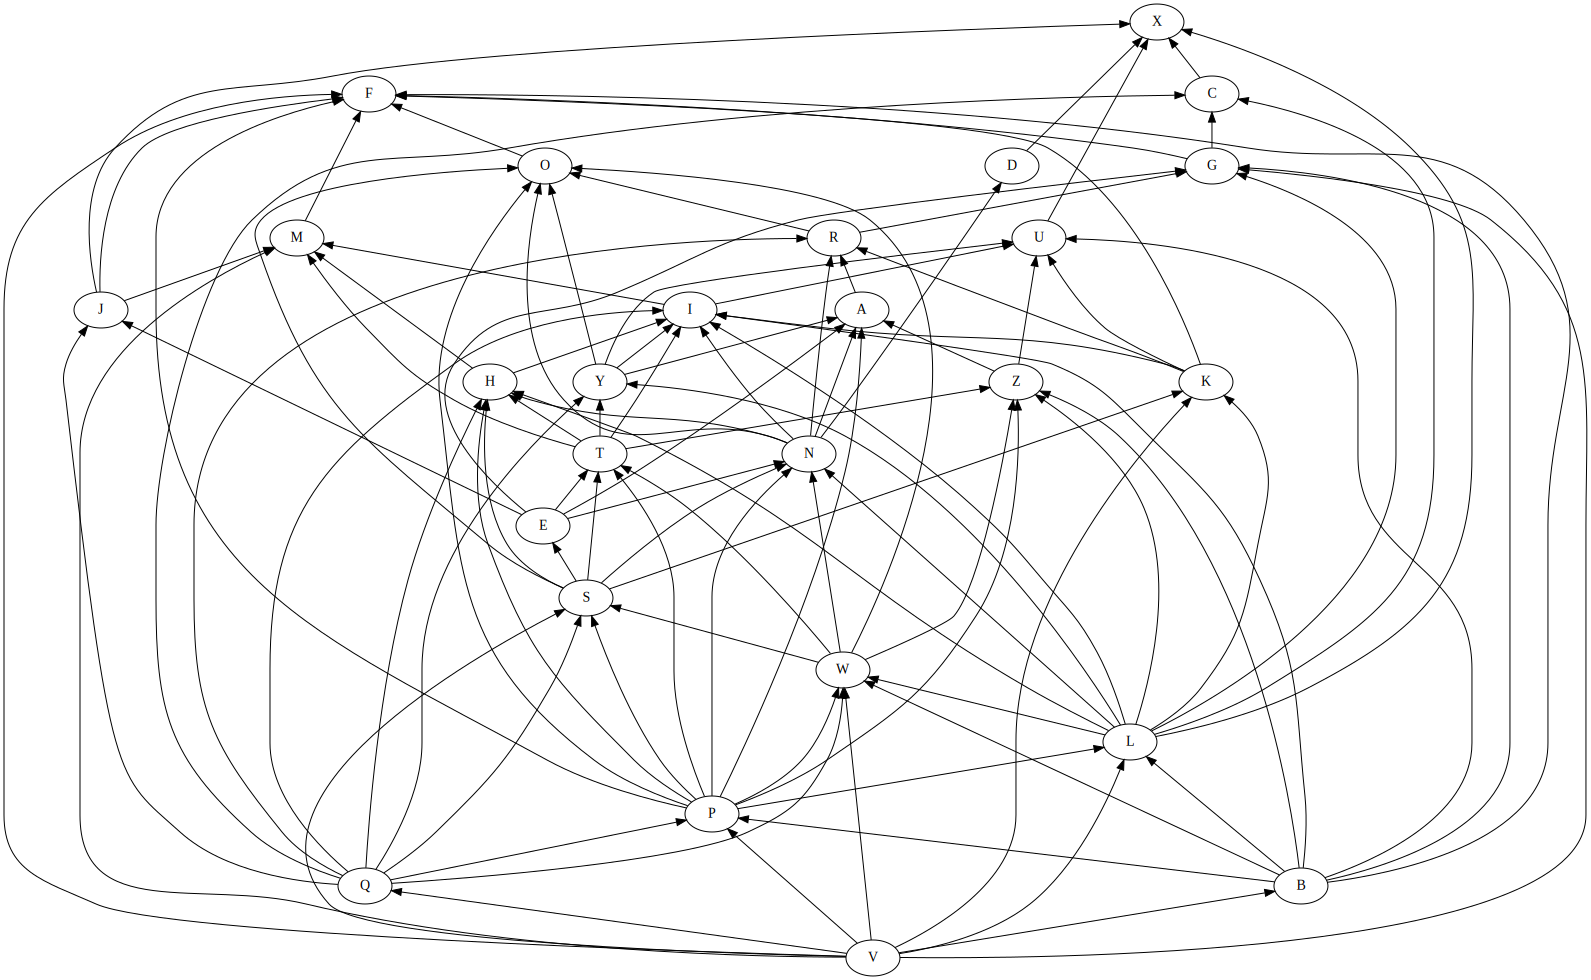

In [1]:
import string
from graphviz import Digraph
from collections import defaultdict

def read_tree():
    with open('../inputs/07/input.txt') as fp:
        pairs = [(line[5], line[-12]) for line in fp.read().splitlines()]
    tree = {}
    for parent, child in pairs:
        for node in parent, child:
            if node not in tree:
                tree[node] = []
        tree[child].append(parent)
    return tree

def visualize(tree):
    g = Digraph()
    g.attr(rankdir='BT')
    for child, parents in tree.items():
        for parent in parents:
            g.edge(child, parent)
    return g

def get_ready_tasks(tree):
    return sorted(k for k, v in tree.items() if not v)

def do_task(tree, task):
    return {k: [v for v in vs if not v == task] for k, vs in tree.items() if not k == task}

def get_task_time(task):
    extra = string.ascii_uppercase.index(task) + 1
    return 60 + extra

def get_available_workers(state, n):
    return [i for i in range(n) if i not in state]

def get_tasks_in_progress(state):
    return [task for task, _ in state.values()]

def prettify_state(state):
    return ', '.join([f"{worker}={task}@{time_left}" for worker, (task, time_left) in state.items()])

def work_with_workers(tree, n=5):
    second = 0
    workers = string.ascii_uppercase[:n]
    state = {}
    
    while True:
        ready_tasks = get_ready_tasks(tree)
        
        # see if we are done
        if not ready_tasks:
            print(f"[t={second:04}] finished")
            break
        
        # assign out tasks
        workers_to_assign = get_available_workers(state, n)
        tasks_to_assign = [task for task in ready_tasks if task not in get_tasks_in_progress(state)]
        for worker, task in zip(workers_to_assign, tasks_to_assign):
            state[worker] = (task, get_task_time(task))
            print(f"[t={second:04}] assigning worker {worker} to {task} [{prettify_state(state)}]")
        
        # tick: each worker does one second of work
        second += 1
        for worker in list(state.keys()):
            task, time_left = state.pop(worker)
            # check if task is done
            if time_left == 1:
                # commit finished task to state
                tree = do_task(tree, task)
                print(f"[t={second:04}] worker {worker} finished {task} ({len(tree)} remaining)")
                yield task
            else:
                state[worker] = (task, time_left - 1)
                
tree = read_tree()
visualize(tree)

### Part 1

In [2]:
''.join(work_with_workers(tree, n=1))

[t=0000] assigning worker 0 to F [0=F@66]
[t=0066] worker 0 finished F (25 remaining)
[t=0066] assigning worker 0 to M [0=M@73]
[t=0139] worker 0 finished M (24 remaining)
[t=0139] assigning worker 0 to O [0=O@75]
[t=0214] worker 0 finished O (23 remaining)
[t=0214] assigning worker 0 to X [0=X@84]
[t=0298] worker 0 finished X (22 remaining)
[t=0298] assigning worker 0 to C [0=C@63]
[t=0361] worker 0 finished C (21 remaining)
[t=0361] assigning worker 0 to D [0=D@64]
[t=0425] worker 0 finished D (20 remaining)
[t=0425] assigning worker 0 to G [0=G@67]
[t=0492] worker 0 finished G (19 remaining)
[t=0492] assigning worker 0 to J [0=J@70]
[t=0562] worker 0 finished J (18 remaining)
[t=0562] assigning worker 0 to R [0=R@78]
[t=0640] worker 0 finished R (17 remaining)
[t=0640] assigning worker 0 to A [0=A@61]
[t=0701] worker 0 finished A (16 remaining)
[t=0701] assigning worker 0 to U [0=U@81]
[t=0782] worker 0 finished U (15 remaining)
[t=0782] assigning worker 0 to I [0=I@69]
[t=0851] wor

'FMOXCDGJRAUIHKNYZTESWLPBQV'

### Part 2

In [3]:
''.join(work_with_workers(tree, n=5))

[t=0000] assigning worker 0 to F [0=F@66]
[t=0000] assigning worker 1 to X [0=F@66, 1=X@84]
[t=0066] worker 0 finished F (25 remaining)
[t=0066] assigning worker 0 to M [1=X@18, 0=M@73]
[t=0066] assigning worker 2 to O [1=X@18, 0=M@73, 2=O@75]
[t=0084] worker 1 finished X (24 remaining)
[t=0084] assigning worker 1 to C [0=M@55, 2=O@57, 1=C@63]
[t=0084] assigning worker 3 to D [0=M@55, 2=O@57, 1=C@63, 3=D@64]
[t=0084] assigning worker 4 to U [0=M@55, 2=O@57, 1=C@63, 3=D@64, 4=U@81]
[t=0139] worker 0 finished M (23 remaining)
[t=0139] assigning worker 0 to J [2=O@2, 1=C@8, 3=D@9, 4=U@26, 0=J@70]
[t=0141] worker 2 finished O (22 remaining)
[t=0147] worker 1 finished C (21 remaining)
[t=0147] assigning worker 1 to G [3=D@1, 4=U@18, 0=J@62, 1=G@67]
[t=0148] worker 3 finished D (20 remaining)
[t=0165] worker 4 finished U (19 remaining)
[t=0165] assigning worker 2 to I [0=J@44, 1=G@49, 2=I@69]
[t=0209] worker 0 finished J (18 remaining)
[t=0214] worker 1 finished G (17 remaining)
[t=0214] ass

'FXMOCDUJGIRHAKNYZTESWLPBQV'